Checking that the R survey package correctly incorporating weights based on published NHANES example here https://wwwn.cdc.gov/nchs/nhanes/tutorials/Weighting.aspx

In [16]:
# Load libraries
library(dplyr)
library(ggplot2)
library(survey)
library(haven) # for reading in XPT file

In [17]:
# Load the XPT file for 2015-2016 into a dataframe
nhanes_check <- read_xpt("data/DEMO_I.XPT")

In [18]:
# Display the first few rows of the dataframe
head(nhanes_check)

SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,⋯,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
83732,9,2,1,62,NA,3,3,1,NA,⋯,5,1,3,134671.37,135629.51,1,125,10,10,4.39
83733,9,2,1,53,NA,3,3,1,NA,⋯,3,3,NA,24328.56,25282.43,1,125,4,4,1.32
83734,9,2,1,78,NA,3,3,2,NA,⋯,3,1,3,12400.01,12575.84,1,131,5,5,1.51
83735,9,2,2,56,NA,3,3,2,NA,⋯,5,6,NA,102718.00,102078.63,1,131,10,10,5.00
83736,9,2,2,42,NA,4,4,2,NA,⋯,4,3,NA,17627.67,18234.74,2,126,7,7,1.23
83737,9,2,2,72,NA,1,1,1,NA,⋯,5,1,5,11252.31,10878.68,1,128,14,14,2.82


NOTES: 
- On NHANES website "*Non-Hispanic white and other includes non-Hispanic persons who reported races other than black, Asian, or white and non-Hispanic persons who reported multiple races." 
- NHANES website example also combines values 1 & 2, Mexican American & Other Hispanic


> Combine values below

In [19]:
# Combine values 3 and 7 in the RIDRETH3 column of my_dataframe
nhanes_check$RIDRETH3[nhanes_check$RIDRETH3 == 7] <- 3

In [20]:
# Combine values 1 and 2
nhanes_check$RIDRETH3[nhanes_check$RIDRETH3 == 2] <- 1

In [21]:
# Setup survey design obejct
nhanes_check_design <- svydesign(ids = ~SDMVPSU, 
                           strata = ~SDMVSTRA, 
                           weights = ~WTMEC2YR,
                           nest=TRUE,
                           data = nhanes_check)

In [22]:
print(nhanes_check_design)

Stratified 1 - level Cluster Sampling design (with replacement)
With (30) clusters.
svydesign(ids = ~SDMVPSU, strata = ~SDMVSTRA, weights = ~WTMEC2YR, 
    nest = TRUE, data = nhanes_check)


In [23]:
# Calculate the percentage of '4' values in RIDRETH3
percentage_value_4 <- svymean(~I(RIDRETH3 == 4), nhanes_check_design, na.rm = TRUE) * 100

In [24]:
print(percentage_value_4)

                        mean     SE
I(RIDRETH3 == 4)FALSE 88.068 0.0238
I(RIDRETH3 == 4)TRUE  11.932 0.0238


In [25]:
# Calculate the percentage of '3' values in RIDRETH3
percentage_value_3 <- svymean(~I(RIDRETH3 == 3), nhanes_check_design, na.rm = TRUE) * 100

In [26]:
print(percentage_value_3)

                        mean     SE
I(RIDRETH3 == 3)FALSE 35.122 0.0432
I(RIDRETH3 == 3)TRUE  64.878 0.0432


In [27]:
# Calculate the percentage of '6' values in RIDRETH3
percentage_value_6 <- svymean(~I(RIDRETH3 == 6), nhanes_check_design, na.rm = TRUE) * 100

In [28]:
print(percentage_value_6)

                         mean     SE
I(RIDRETH3 == 6)FALSE 94.4257 0.0124
I(RIDRETH3 == 6)TRUE   5.5743 0.0124


In [29]:
# Calculate the percentage of '6' values in RIDRETH3
percentage_value_1 <- svymean(~I(RIDRETH3 == 1), nhanes_check_design, na.rm = TRUE) * 100

In [30]:
print(percentage_value_1)

                        mean     SE
I(RIDRETH3 == 1)FALSE 82.384 0.0297
I(RIDRETH3 == 1)TRUE  17.616 0.0297


In [ ]:
# Showing graph from NHANES webiste below to check weighted numbers are correct:

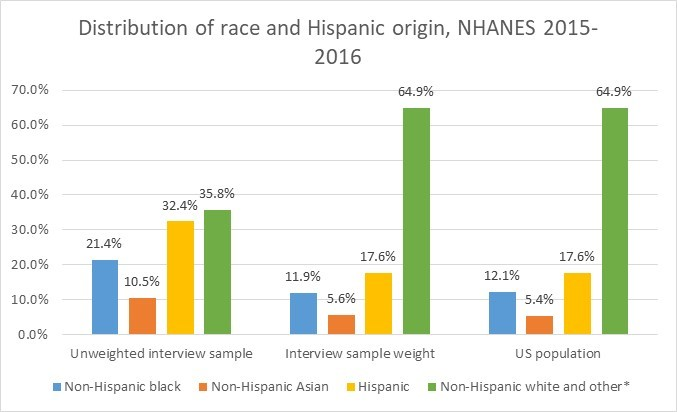